https://finance.yahoo.com/calendar/earnings/?day=2024-01-03


/Users/saumikdana/Machine_Learning_Trading/data/scrape_url.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/Users/saumikdana/Machine_Learning_Trading/data/scrape_url.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ticker_data = pd.concat(ticker_data_list, ignore_index=True)


Options data for UNF:
Average IV for Calls: 0.16953684204101563
Average IV for Puts: 0.2993335855102539
Total Call Volume: 26.0
Total Call open interest: 42
Total Call engagement: 68.0
Total Put Volume: 8.0
Total Put open interest: 10
Total Put engagement: 18.0
Number of ITM Call Options: 7
Number of ITM Put Options: 1


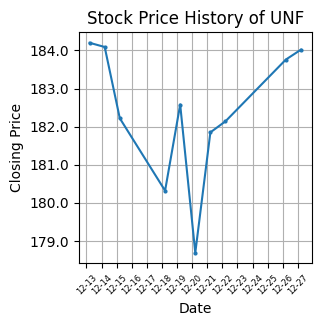

Data fetched for UNF, entries: 71


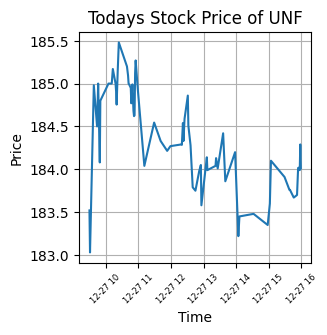

Options data for CALM:
Average IV for Calls: 0.048177146693638394
Average IV for Puts: 0.19064094741430038
Total Call Volume: 484.0
Total Call open interest: 13101
Total Call engagement: 13585.0
Total Put Volume: 616
Total Put open interest: 5523
Total Put engagement: 6139
Number of ITM Call Options: 37
Number of ITM Put Options: 7


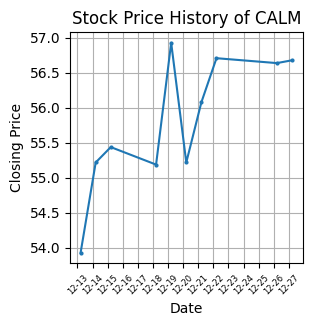

Data fetched for CALM, entries: 315


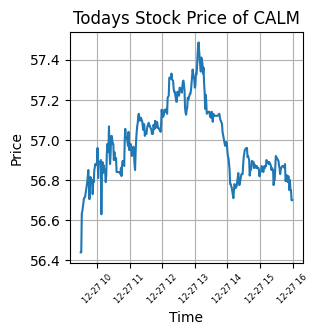

Options data for SLP:
Average IV for Calls: 0.1659288526763916
Average IV for Puts: 0.3423530853271484
Total Call Volume: 21.0
Total Call open interest: 119
Total Call engagement: 140.0
Total Put Volume: 19.0
Total Put open interest: 108
Total Put engagement: 127.0
Number of ITM Call Options: 9
Number of ITM Put Options: 1


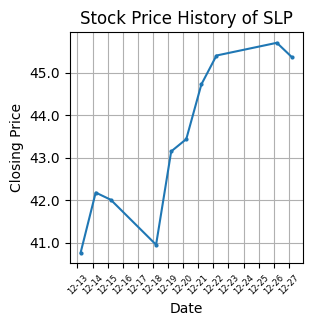

Data fetched for SLP, entries: 142


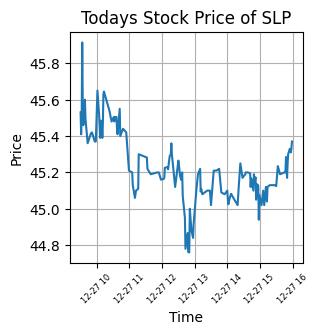

Options data for FC:
Average IV for Calls: 0.6652581008097329
Average IV for Puts: 0.8907504727172852
Total Call Volume: 75.0
Total Call open interest: 153
Total Call engagement: 228.0
Total Put Volume: 52
Total Put open interest: 130
Total Put engagement: 182
Number of ITM Call Options: 7
Number of ITM Put Options: 2


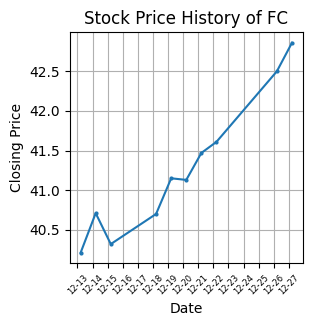

Data fetched for FC, entries: 51


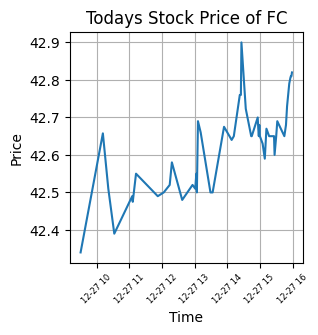

Options data for AEHR:
Average IV for Calls: 0.18941588339271123
Average IV for Puts: 0.43662242306779
Total Call Volume: 1826.0
Total Call open interest: 29855
Total Call engagement: 31681.0
Total Put Volume: 1257.0
Total Put open interest: 9655
Total Put engagement: 10912.0
Number of ITM Call Options: 45
Number of ITM Put Options: 51


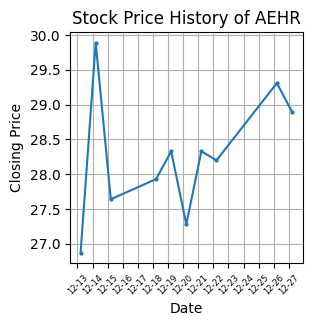

Data fetched for AEHR, entries: 338


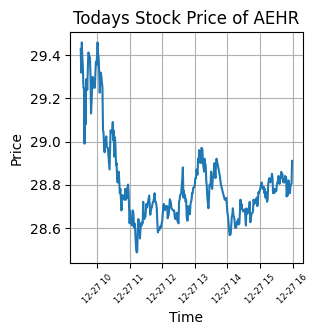

Options data for PKE:
Average IV for Calls: 0.26810085205078127
Average IV for Puts: 0.25933900390625
Total Call Volume: 23.0
Total Call open interest: 133
Total Call engagement: 156.0
Total Put Volume: 4.0
Total Put open interest: 12
Total Put engagement: 16.0
Number of ITM Call Options: 2
Number of ITM Put Options: 2


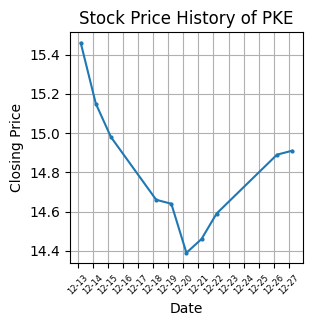

Data fetched for PKE, entries: 43


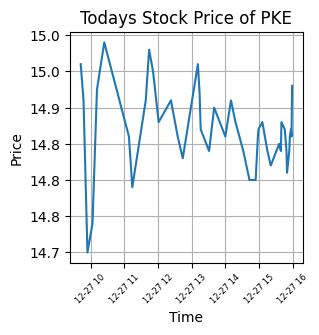

Options data for RGP:
Average IV for Calls: 0.21587698193359375
Average IV for Puts: 0.3046344787597656
Total Call Volume: 26.0
Total Call open interest: 187
Total Call engagement: 213.0
Total Put Volume: 9.0
Total Put open interest: 120
Total Put engagement: 129.0
Number of ITM Call Options: 2
Number of ITM Put Options: 2


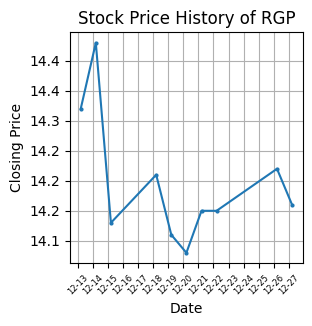

Data fetched for RGP, entries: 160


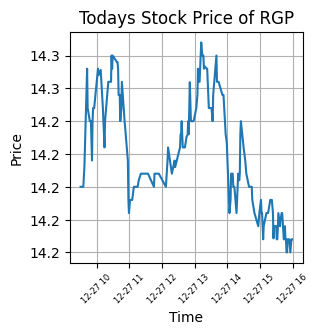

Options data for SICP:
Average IV for Calls: 1.2940626382461595
Average IV for Puts: 0.7136676391593545
Total Call Volume: 884.0
Total Call open interest: 40885.0
Total Call engagement: 41769.0
Total Put Volume: 255.0
Total Put open interest: 14607.0
Total Put engagement: 14862.0
Number of ITM Call Options: 0
Number of ITM Put Options: 98


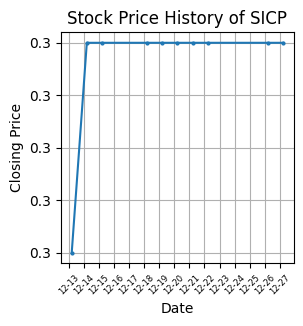

Data fetched for SICP, entries: 114


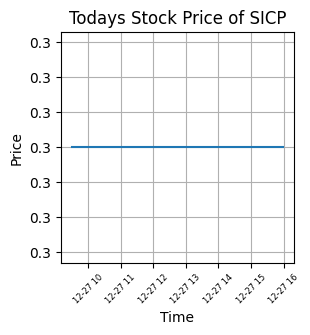

In [1]:
from datetime import datetime, timedelta
from analyze_stock import *  
from scrape_url import *

# Call the function and store the result
day = '2024-01-03'

# Set the time frame
date = datetime.strptime(day, '%Y-%m-%d')
end_date = date + timedelta(days=7)
start_date = date - timedelta(days=21)

# Check if start_date is earlier than today, if not change start_date to today - 7 days
current_date = datetime.now()
start_date = current_date - timedelta(days=14) if start_date >= current_date else start_date

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day
print(url)

ticker_data_list = process_earnings_table(extract_table(url))
    
# Second page
url += '&offset=100&size=100'

ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)

# Pandas Dataframe
ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if pd.isna(options_metrics['avg_put_implied_volatility']):
        continue
    
    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get All Analysis
    get_info(ticker, options_metrics, start_date, end_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted